In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import re

# Data Cleaning

##### remove upper_case (df_series_analysis)
#### drop tokens_raw

In [2]:
import os
import re

cwd = os.getcwd()
path = os.path.join(cwd+'/'+'Episodes')
file_path = [path+'/'+element for element in os.listdir(path) if element != '.DS_Store']

transcript = []
titles = []
character_name = []
spoken_words = []
raw_text = []

for file in file_path:
    kaggle_transcript = open(file,'r')
    text = kaggle_transcript.read() #transcript
    text = re.sub('\d+:\d+', '', text)
    text = re.sub('\[.*?\]','',text)
    text = re.sub('\(.*?\)','',text)
    raw_text = re.findall('\n(.+):(.+)', text) #### check all character lines are included in the dataframe ->  #other options -> #raw_text = re.findall('\n(.+):(.+)\n', text)
    df = pd.DataFrame({'raw_text':raw_text})
    df['titles'] = file.split('/')[8] #find better way
#     text = ' '.join(text.split())
#     transcript.append(text)
#     titles.append(file.split('/')[8])
#     df = pd.DataFrame({'raw_text':text})
    transcript.append(df)

In [3]:
# df_spongebob = pd.DataFrame({'titles':titles, 'raw_text':transcript})
df_spongebob = pd.concat(transcript, ignore_index=True)
df_spongebob

,raw_text,titles
0,"(Mrs. Puff, Now, SpongeBob, what is the prop...",LighthouseLouie.txt
1,"(SpongeBob, Hold on, I'll check the textbook...",LighthouseLouie.txt
2,"(Mrs. Puff, Assuming crash position.)",LighthouseLouie.txt
3,"(Mrs. Puff, We didn't crash!)",LighthouseLouie.txt
4,"(SpongeBob, Hooray!)",LighthouseLouie.txt
...,...,...
42494,"(Patchy, An enlarged forehead?)",Ugh.txt
42495,"(Potty, No. )",Ugh.txt
42496,"(Patchy, Aww, what is it? Potty!!! )",Ugh.txt
42497,"(Potty, This is great. )",Ugh.txt


In [4]:
df_spongebob['character_names'] = df_spongebob['raw_text'].apply(lambda x: x[0])
df_spongebob['titles'] = df_spongebob['titles'].apply(lambda x:x.split('.')[0])
df_spongebob['spoken_words'] = df_spongebob['raw_text'].apply(lambda x: x[1])
df_spongebob['character_names'] = df_spongebob['character_names'].apply(lambda x: x.title())
df_spongebob['titles'] = df_spongebob['titles'].apply(lambda x:' '.join(re.findall('[A-Z][^A-Z]*', x)))

df_spongebob_characters = df_spongebob
df_spongebob['spoken_words'] = df_spongebob['spoken_words']+' '
df_spongebob = df_spongebob[['titles', 'spoken_words']]
df_spongebob.rename(columns={'spoken_words':'transcripts'}, inplace=True)

/Applications/anaconda3/envs/scrapping/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
df_spongebob = df_spongebob.groupby('titles', as_index=False).sum()

### Test number of words

In [6]:
# df_spongebob[df_spongebob['titles'].str.contains('Pat No Pay')]
# len(df_spongebob.at[206, 'transcripts'].split()) #it gives different results .split(' ')
# df_spongebob.at[206, 'titles']

In [7]:
%store -r df_nation
%store -r df_series_groups

In [8]:
#df_nation grouped by level_frequency 
# 0 -> 26 (proper_names) , 27 (marginal_words), 28 (compounds), 29 (acronyms)
# (5-25) -> levels from 5 to 15
#df_nation grouped by levels_coverage
# 15 -> (15: list between 15 and 25)

# df_nation.groupby('levels').count()
# df_nation.groupby('levels_frequency').count()
df_nation.groupby('levels_coverage').count() 
df_nation.sort_values('all_forms')

,base_forms,all_forms,levels,levels_frequency,levels_coverage
56173,a,a,1,1,1
1149,a1,a1,26,0,26
1150,a11,a11,26,0,26
1151,a168,a168,26,0,26
1152,a19,a19,26,0,26
...,...,...,...,...,...
30895,emigre,émigrés,12,5-25,12
69601,esprit,ésprit,16,5-25,15
89976,etoile,étoile,20,5-25,15
52372,etudes,étude,15,5-25,15


### Cleaning non-English letters

In [9]:
#'ν' --> 'v'
df_spongebob['transcripts'] = df_spongebob['transcripts'].apply(lambda x:re.sub('ν', 'v', x))
# 'l'--> i e.g. lmp (imposible) -> There's a problem coming from the source of the transcripts itself
# all i in upper case are treated as l (l in lower case) Fortunately most of them are pronouns like 'I' , but some words starting with 'i' in upper case are lost (small %)

In [10]:
df_spongebob['raw_tokens'] = df_spongebob['transcripts'].apply(lambda x:len(x.split()))

In [11]:
#the difference between tokens_raw and tokens shouldn't be so much since only speaker's name,
#words within parentheses and squarebrackets were removed
print('Min Raw: ' + str(df_spongebob['raw_tokens'].min()))
# #and only contractions were added "'n" --> 'not'
print('Max Raw: ' + str(df_spongebob['raw_tokens'].max()))

Min Raw: 68
Max Raw: 5454


In [12]:
df_spongebob[df_spongebob['titles'].str.contains('Pat No')]

,titles,transcripts,raw_tokens
206,Pat No Pay,"Yeesh, we need some customers in here. What'...",409


In [72]:
#first boxplot
# import plotly_express as px
# import plotly.graph_objects as go
# from plotly.offline import iplot, init_notebook_mode

# fig = go.Figure()
# fig.add_box(x=df_spongebob['raw_tokens'], text=df_spongebob.titles)
# iplot(fig)

# sns.boxplot(x=df_spongebob['raw_tokens'])

In [14]:
#dropping corrupted transcripts
# df_spongebob.drop([26, 35, 115, 153, 276], inplace=True)
# df_spongebob.reset_index(drop=True, inplace=True)

In [15]:
# cleaning transcripts
#keep in mind that some transcripts contain comma with no space like 'hi,how are you' or " instead of ' like 'you"re'. after cleaning they, the trancsripts become useless
from cleaning import clean_transcripts

round1 = lambda x: clean_transcripts(x)
df_spongebob['transcripts'] = df_spongebob['transcripts'].apply(round1)

In [16]:
# df_series_clean_except_transcripts.groupby('series_titles').count()
df_spongebob = df_spongebob.assign(tokens=df_spongebob['transcripts'].apply(lambda x:len(x.split())))

In [17]:
#Some episodes have 4 min while one has more than 30 min
df_spongebob = df_spongebob[(df_spongebob['raw_tokens']>=200) & (df_spongebob['raw_tokens']<=4000)]
# .mean()
# (df_coverage_episode['levels_coverage']<=4)

In [18]:
#the difference between tokens_raw and tokens shouldn't be so much since only speaker's name,
#words within parentheses and squarebrackets were removed
print('Min Raw: ' + str(df_spongebob['raw_tokens'].min()) + ', Min Clean: '+ str(df_spongebob['tokens'].min()))
# #and only contractions were added "'n" --> 'not'
print('Max Raw: ' + str(df_spongebob['raw_tokens'].max()) + ', Max Clean: '+ str(df_spongebob['tokens'].max()))

Min Raw: 237, Min Clean: 254
Max Raw: 3925, Max Clean: 4116


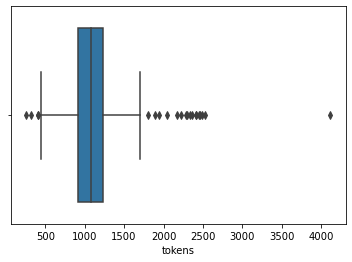

In [19]:
#final boxplot
sns.boxplot(x=df_spongebob['tokens'])

### Episodes with less dialogues (less words to worry about)

In [20]:
df_spongebob.sort_values('raw_tokens')[:5]

,titles,transcripts,raw_tokens,tokens
241,Riseand Shine,goodmorning gary meow say gary do you ever ...,237,254
25,Boat Smarts,cobbutksbspotraoobat citizens of bikini botto...,306,314
344,The Krusty Plate,well good night folks come again thought tho...,377,409
32,Breakin,spongebob spatula down sailor what s going ...,384,410
206,Pat No Pay,yeesh we need some customers in here what s ...,409,445


# Exploratory Data Analysis

### Document-Term Matrix¶

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import scipy.sparse
cv = CountVectorizer()#only misleading words excluded for the analysis
cv_matrix = cv.fit_transform(df_spongebob['transcripts'])
df_dtm = pd.DataFrame.sparse.from_spmatrix(cv_matrix, index=df_spongebob.index,
                                           columns=cv.get_feature_names())

In [22]:
df_dtm = df_dtm.T

# Formula

In [23]:
def get_frames(indices, dtm, thousand_level=None): #, thousand_level ['4'], ['5-14']
    """1. The df_dtm gives the number of times a word (all_forms) shows up in an episode/movie
       2. Then its joined to get the level and base_forms of each word
       3. The final df has the words counted for each episode so it can be seen base_forms repetition in the final df"""
    frames = []
    for index in indices:
        df_count_words = dtm[[index]].loc[dtm[index]!=0]
        df_count_words = df_count_words.reset_index()
        df_count_words.rename(columns={"index": "all_forms", index: "count"}, inplace=True)

        df_count_words_level = pd.merge(df_count_words, df_nation[['base_forms', 'all_forms',
                                'levels_frequency', 'levels', 'levels_coverage']], how='left', on='all_forms', indicator=True)
        df_count_words_level.loc[df_count_words_level['_merge']=='left_only', 'levels_coverage'] = 100
        if thousand_level is not None: #only consider words in specific levels
            df_count_words_level = df_count_words_level[df_count_words_level['levels_frequency'].isin(thousand_level)]
        frames.append(df_count_words_level)
    df_count_words_level = pd.concat(frames)
    return df_count_words_level

In [24]:
def get_coverage(indices, df_dtm):
    frames = []
    for episode_index in indices:
        df_coverage_episode = get_frames([episode_index], df_dtm) ##
        df_coverage_episode = df_coverage_episode[['count' ,'levels_coverage']].groupby('levels_coverage').sum()
        df_coverage_episode.drop([28, 29], axis=0, inplace=True, errors='ignore')
        df_coverage_episode['%'] = 100 * (round(df_coverage_episode['count']/
                                            df_coverage_episode['count'].sum(), 4))
        df_coverage_episode = df_coverage_episode.reset_index()
        condition = [(df_coverage_episode['levels_coverage']<=4),
            (df_coverage_episode['levels_coverage']>=5) & (df_coverage_episode['levels_coverage']<=15),
                    (df_coverage_episode['levels_coverage']>=26)] #15 includes list from 15 to 25
        values = [df_coverage_episode['levels_coverage'], 5, df_coverage_episode['levels_coverage']]
        df_coverage_episode['lvl'] = np.select(condition, values)
        df_coverage_episode = df_coverage_episode.groupby('lvl').sum()
        df_coverage_episode['cumulative'] = df_coverage_episode['%'].cumsum()
        if len(indices)==1:   
            df_coverage_episode = df_coverage_episode[['count', '%']].T.reset_index(drop=True)
        elif len(indices)>1:
            df_coverage_episode = df_coverage_episode[['%']].T.reset_index(drop=True)
            df_coverage_episode['index'] = episode_index
        frames.append(df_coverage_episode)
    return frames

### Vocabulary coverage of a random episode

In [25]:
index = 57 #episode number is different from index!!!
series_name = 'SpongeBob'
df_random_episode = get_coverage([index], df_dtm)[0]
df_random_episode.rename(columns={26:'Character names', 27:'Interjections', 
                                  100:series_name+" words"}, inplace=True)
df_random_episode.T.rename(columns={0:'count', 1:'%'})

,count,%
lvl,,
1.0,903.0,81.42
2.0,62.0,5.59
3.0,11.0,0.99
4.0,10.0,0.90
5.0,48.0,4.32
Character names,15.0,1.35
Interjections,35.0,3.16
SpongeBob words,25.0,2.25


### Unique words in the TV show

In [26]:
df_words_series = get_frames(df_spongebob.index.values, df_dtm)
df_words_series = df_words_series[['all_forms', 'count', 'levels_coverage']]
df_words_series = df_words_series[df_words_series['levels_coverage']==100]
df_words_series

#check .groupby sparse(int64)
list_words = list(df_words_series['all_forms'])
list_count = list(df_words_series['count'])

In [27]:
df_words_series.sort_values('count', ascending=False)[:10]

,all_forms,count,levels_coverage
176,krabby,32,100.0
198,krabs,30,100.0
170,krabs,28,100.0
289,krabby,28,100.0
171,krabs,28,100.0
329,lelly,27,100.0
164,krabs,25,100.0
184,krabs,25,100.0
189,krabs,24,100.0
114,fwee,24,100.0


### Wordcloud

In [28]:
character_name = ['krabs', 'krab', 'eedle', 'yall', 'amon', 'stinky', 'boop',
                 'eww', 'fwee', 'leedle', 'squiddy', 'whirly', 'squilliam']
# some transcripts have words such as You"re, don"t -> my cleaning.py doesn't sub ", but '
clean_words = ['youre', 'dont', 'didnt', 'youll', 'youve', 'shes', 'doesnt', 'sub', 'maam',
               'facebook', 'bitcoin','elderman', 'autotrophs', 'ew', 'grad', 'opensubtitlesorg']#sync corrected...., 'autotrophs' part of the song, grad student
character_name.extend(clean_words)

df_words_series = pd.DataFrame({'words':list_words, 'count':list_count})
df_words_series = df_words_series.groupby('words', as_index=False).sum().sort_values('count', ascending=False)

# words only found in the series excluding character names
df_words_series = df_words_series[~df_words_series['words'].isin(character_name)]
df_words_series['words'] = df_words_series['words'].apply(lambda x:x+' ')
df_words_series['text'] = df_words_series['words']*df_words_series['count']
words = ''.join(df_words_series['text'])

import stylecloud
from wordcloud import STOPWORDS

#FF5733
#900C3F
stylecloud.gen_stylecloud(words, palette="cmocean.sequential.Matter_16", 
                          background_color="white", icon_name= "fas fa-hamburger",
                          colors=['#C6560D', '#C6560D', '#C6560D'], collocations=False)

In [52]:
#words repeated in all episodes in list 100 (TV series own vocabulary, particular phrases)
df_words_series.sort_values('count',ascending=False)[:10][['words', 'count']]
# find where those words were spoken
# df_spongebob[df_spongebob['transcripts'].str.contains('bitcoin')]
# df_spongebob.loc[235, 'transcripts']

,words,count
1144,krabby,810
1968,squarepants,166
1074,jellyfishing,54
977,howdy,30
1200,lelly,27
2168,treedome,22
1536,patar,21
1107,kelpy,21
2336,weenie,21
753,fruitcake,20


### Vocabulary coverage of the average episode - Which is the best TV show for learning a language?

In [30]:
frames = get_coverage(df_spongebob.index.values, df_dtm)

In [31]:
pd.concat(frames, axis=0, ignore_index=True)[[1, 2, 3, 4, 5, 26, 27, 100]].mean()

1.0      80.202603
2.0       4.461521
3.0       1.275659
4.0       1.232513
5.0       4.664485
26.0      3.116933
27.0      3.089897
100.0     1.966521
dtype: float64

### Vocabulary coverage in all episodes

In [32]:
df_seasons = pickle.load(open('df_seasons', 'rb'))
df_seasons['seasons'] = df_seasons['seasons'].apply(lambda x:''.join(re.findall('(S)eason (\d+) \(.+\)', x)[0]))#extracting only (S)eason (1)
df_seasons['titles'] = df_seasons['titles'].apply(lambda x:re.sub('"', '', x).strip())
df_seasons['titles'] = df_seasons['titles'].apply(lambda x:re.sub('\[.+\]', '', x).strip())
df_seasons['episodes'] = df_seasons['seasons'] + 'E' + df_seasons['episodes'] + ': ' + df_seasons['titles']

from fuzzywuzzy import process, fuzz
titles_1 = df_spongebob['titles'].tolist()
titles_2 = df_seasons['titles'].tolist()

df_spongebob['titles_2'] = df_spongebob['titles'].apply(lambda x:process.extractOne(x, titles_2, scorer=fuzz.token_sort_ratio)[0])
df_spongebob['score'] = df_spongebob['titles'].apply(lambda x:process.extractOne(x, titles_2, scorer=fuzz.token_sort_ratio)[1])
# df_spongebob.sort_values('score', ascending=True)[50:100]
# df_test = pd.merge(df_spongebob, df_seasons[['episodes', 'titles']], on='titles', how='outer',
#                   indicator=True).query('_merge=="left_only"')

In [57]:
df_statistics = pd.concat(frames, axis=0, ignore_index=True)[['index', 1, 2, 3, 4, 5, 26, 27, 100]]
df_statistics = df_statistics.fillna(0)
#assume you know interjections, character names and words created in the tv series
df_statistics['Lvl 1'] = df_statistics[1] + df_statistics[26] + df_statistics[27] + df_statistics[100]
df_statistics['Lvl 1+2'] = df_statistics['Lvl 1'] + df_statistics[2]
df_statistics['Lvl 1+2+3'] = df_statistics['Lvl 1+2'] + df_statistics[3]
df_statistics['Lvl 1+2+3+4'] = df_statistics['Lvl 1+2+3'] + df_statistics[4]
df_statistics = pd.concat((df_statistics.set_index('index'), df_spongebob[['titles']]), axis=1)
df_statistics

,1.0,2.0,3.0,4.0,5.0,26.0,27.0,100.0,Lvl 1,Lvl 1+2,Lvl 1+2+3,Lvl 1+2+3+4,titles
0,80.08,2.62,0.73,1.47,8.57,1.36,3.46,1.68,86.58,89.20,89.93,91.40,A Cabininthe Kelp
1,85.14,2.09,0.20,0.50,2.70,5.08,2.59,1.69,94.50,96.59,96.79,97.29,A Day Without Tears
2,77.52,5.77,1.32,0.96,5.04,2.40,4.57,2.40,86.89,92.66,93.98,94.94,A Fleain Her Dome
3,83.86,3.25,1.01,0.56,3.81,3.59,3.48,0.45,91.38,94.63,95.64,96.20,A Friendly Game
4,80.80,2.84,0.85,0.85,4.39,7.82,1.85,0.57,91.04,93.88,94.73,95.58,A Lifeina Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,80.83,3.87,0.54,0.90,6.48,3.24,2.43,1.71,88.21,92.08,92.62,93.52,Wigstruck
388,80.51,7.08,2.67,1.04,1.98,3.83,1.39,1.51,87.24,94.32,96.99,98.03,Wormy
389,79.56,4.22,0.92,2.29,4.47,2.93,2.11,3.48,88.08,92.30,93.22,95.51,Yeti Krabs
390,79.40,3.60,0.50,1.20,4.00,4.00,4.60,2.70,90.70,94.30,94.80,96.00,You Dont Know Spongebob


#### Filtering more episodes out (with list 100)

In [76]:
df_spongebob

,titles,transcripts,raw_tokens,tokens,titles_2,score
0,A Cabininthe Kelp,we are going to have so much fun a weekend i...,976,1041,A Cabin in the Kelp,78
1,A Day Without Tears,good morning day ow i stubbed my toe i stu...,1048,1117,A Day Without Tears,100
2,A Fleain Her Dome,there there spongebob no need to cry yes th...,898,911,A Flea in Her Dome,86
3,A Friendly Game,patrick tee time patrick patrick tee time pa...,917,960,A Friendly Game,100
4,A Lifeina Day,this is how to live is not it my friend you ...,718,748,A Life in a Day,71
...,...,...,...,...,...,...
387,Wigstruck,man this is gonna be our most rocking tour ev...,1174,1223,Wigstruck,100
388,Wormy,ah sandy cheeks is going out of town and has ...,874,948,Wormy,100
389,Yeti Krabs,squidward what is your problem my problem ...,1116,1195,Yeti Krabs,100
390,You Dont Know Spongebob,can you two be quiet did not think so wh...,1039,1086,You Don't Know Sponge,86


In [70]:
# df_spongebob[df_spongebob['titles'].str.contains('Gary Takesa')]
# df_spongebob[df_spongebob['titles'].str.contains('Krusty Klean')]
# df_statistics[df_statistics['titles'].str.contains('The Bad Guy')]
# df_statistics[df_statistics['titles'].str.contains('Once Bitten')]
# df_statistics[df_statistics['titles'].str.contains('Spongicu')]

# df_spongebob.at[91, 'transcripts']

In [59]:
#rule of thum % in list 100 <3.5
#most of the words in list 100 of the episode S12E3 are 'you"re' or 'don"t' so it's fine to consider them in LVL1
df_statistics.sort_values(100, ascending=False)[:10]
# df_statistics[df_statistics['titles'].str.contains('Krusty Klean')]
# df_statistics[df_statistics['titles'].str.contains('The Bad Guy')]
df_statistics[df_statistics['titles'].str.contains('Once Bitten')]
df_statistics[df_statistics['titles'].str.contains('Spongicu')]

,1.0,2.0,3.0,4.0,5.0,26.0,27.0,100.0,Lvl 1,Lvl 1+2,Lvl 1+2+3,Lvl 1+2+3+4,titles
284,74.82,8.09,2.97,1.33,7.97,1.23,2.25,1.33,79.63,87.72,90.69,92.02,Spongicus


### Top 10 GoT episodes (easies vocabulary)

In [60]:
for i in df_statistics.sort_values(['Lvl 1'], ascending=False)[:10].values:
    print(i[12])

Dont Look Now
A Day Without Tears
The Thing
Broken Alarm
Karens Baby
Home Sweet Pineapple
Rocka Bye Bivalve
Fun Sized Friends
Mid Life Crustacean
Waiting


### ScatterPlot

In [61]:
#preparing data
df_statistics = df_statistics.sort_values('Lvl 1', ascending=False)
df_1 = df_statistics[['Lvl 1', 'titles']]
df_1 = df_1.assign(label = 'Lvl 1')
df_1.rename(columns={'Lvl 1':'lvl'}, inplace=True)
df_2 = df_statistics[['Lvl 1+2', 'titles']]
df_2 = df_2.assign(label = 'Lvl 1+2')
df_2.rename(columns={'Lvl 1+2':'lvl'}, inplace=True)
df_3 = df_statistics[['Lvl 1+2+3', 'titles']]
df_3 = df_3.assign(label = 'Lvl 1+2+3')
df_3.rename(columns={'Lvl 1+2+3':'lvl'}, inplace=True)
# df_4 = df_statistics[['Lvl 1+2+3+4', 'season_episode_names']]
# df_4 = df_4.assign(label = 'Lvl 1+2+3+4')
# df_4.rename(columns={'Lvl 1+2+3+4':'lvl'}, inplace=True)

# df_dot = pd.concat([df_1, df_2, df_3]) #if coverage is too different between episodes filter out df_2 (lvl1+2)
df_dot = pd.concat([df_1, df_3]) #if coverage is too different between episodes filter out df_2 (lvl1+2)
df_dot['lvl'] = df_dot['lvl'].apply(lambda x:round(x,1))
df_dot.reset_index(drop=True, inplace=True)

In [62]:
#adding ranking column
rank = df_dot.index.values
df_dot['rank'] = rank+1
df_dot.loc[df_dot['rank']>len(df_statistics), 'rank']='-'
df_dot

,lvl,titles,label,rank
0,95.2,Dont Look Now,Lvl 1,1
1,94.5,A Day Without Tears,Lvl 1,2
2,94.0,The Thing,Lvl 1,3
3,93.8,Broken Alarm,Lvl 1,4
4,93.8,Karens Baby,Lvl 1,5
...,...,...,...,...
771,87.2,Treats,Lvl 1+2+3,-
772,89.9,The Bad Guy Clubfor Villains,Lvl 1+2+3,-
773,89.9,Once Bitten,Lvl 1+2+3,-
774,90.1,Boat Smarts,Lvl 1+2+3,-


In [63]:
episode_count = []

for index, percentage in enumerate(df_dot['lvl']):
    subset = df_dot.iloc[:index+1]    # Create subset starting at the beginning of dataset until the episode
    count = len(subset[subset['lvl'] == percentage])   # Count all episode with same % in this subset
    episode_count.append(count)
    
df_dot['count'] = episode_count

In [64]:
df_dot['titles'] = df_dot['titles'].apply(lambda x:re.sub(',', '', x))

In [68]:
# data for DataWrapper
# for i in df_dot.values:
#     print(i[1] + ' , ' + i[2] + ' , ' + str(i[3]) + ' , ' + str(i[4]) + ' , ' + str(i[0]))

In [50]:
# df_spongebob[df_spongebob['titles'].str.contains('Spongicus')]
# df_spongebob.at[284, 'transcripts']

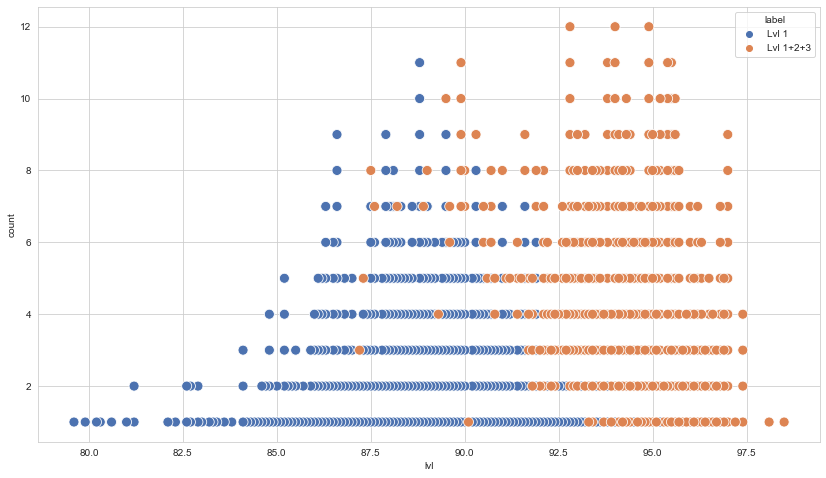

In [69]:
#Static plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.scatterplot(x='lvl', y='count', data=df_dot,
             hue='label', s=100, ax=ax, palette="deep")

# Interactive plot
# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode
# init_notebook_mode()

# fig = go.Figure()
# for genre, df_genre in df_dot.groupby('label'):
#     fig.add_scatter(x=df_genre["lvl"], y=df_genre['count'], text=df_genre['titles'],
#     name=genre, mode='markers')
# iplot(fig)

### What hard words are they saying across all GoT episodes?

In [43]:
frames_2 = []
for episode_index in df_spongebob.index.values:
    df_vocabulary_episode = get_frames([episode_index], df_dtm, ['3', '4', '5-25'])
    df_vocabulary_episode['index'] = episode_index
    frames_2.append(df_vocabulary_episode)

In [44]:
df_spongebob_lvl = pd.concat(frames_2)
df_spongebob_lvl = pd.merge(df_spongebob_lvl, df_spongebob[['titles']].reset_index(), on='index')
df_spongebob_lvl = df_spongebob_lvl[['all_forms', 'count', 'base_forms', 'levels_frequency', 'titles']]
df_spongebob_lvl['titles'] = df_spongebob_lvl['titles'].apply(lambda x:re.sub(',', '', x))
df_spongebob_lvl
# df_spongebob_lvl[df_spongebob_lvl['levels_coverage']>=15]

,all_forms,count,base_forms,levels_frequency,titles
0,apes,1,ape,5-25,A Cabininthe Kelp
1,barnacles,1,barnacle,5-25,A Cabininthe Kelp
2,boo,1,boo,5-25,A Cabininthe Kelp
3,brine,1,brine,5-25,A Cabininthe Kelp
4,bunnies,1,bunny,5-25,A Cabininthe Kelp
...,...,...,...,...,...
17730,tattletale,1,tattletale,5-25,Yours Mineand Mine
17731,thrilled,1,thrill,3,Yours Mineand Mine
17732,trinket,1,trinket,5-25,Yours Mineand Mine
17733,upgrade,1,upgrade,4,Yours Mineand Mine


In [67]:
# # data for Datawrapper
# for i in df_spongebob_lvl.values:
#     print(str(i[0])+', '+str(i[1])+', '+str(i[2])+', '+str(i[3])+', '+str(i[4]))